In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
A1 = tf.Variable([1,2,3,4])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-12 10:06:27.822732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-12 10:06:27.823425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
A1

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [5]:
A1.numpy()

array([1, 2, 3, 4], dtype=int32)

In [6]:
A23 = tf.Variable([[1,2,3],[1,6,4]])

B1 = tf.ones_like(A1)
B23 = tf.ones_like(A23)

C23 = tf.multiply(A23,B23)

In [7]:
C23

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 6, 4]], dtype=int32)>

In [8]:
wealth = tf.Variable([[11,50],[7,2],[4,60],[3,0],[25,10]])

In [9]:
wealth.numpy()

array([[11, 50],
       [ 7,  2],
       [ 4, 60],
       [ 3,  0],
       [25, 10]], dtype=int32)

In [10]:
## Example of dot product
D22 = tf.Variable([[4,0],[1,-9]])
E22 = tf.Variable([[8,0],[2,-18]])

F22 = tf.matmul(D22,E22)
F22.numpy()

array([[ 32,   0],
       [-10, 162]], dtype=int32)

In [11]:
## reduce dimension by adding across col
tf.reduce_sum(wealth,1).numpy()

array([61,  9, 64,  3, 35], dtype=int32)

In [12]:
## reduce dimension by adding across row
tf.reduce_sum(wealth,0).numpy()

array([ 50, 122], dtype=int32)

In [13]:
A23_vector = tf.reshape(A23,[2*3,1])

In [14]:
A23_vector.numpy()

array([[1],
       [2],
       [3],
       [1],
       [6],
       [4]], dtype=int32)

In [15]:
from tensorflow import GradientTape, multiply, Variable

In [16]:
def compute_gradient(x0):
    # define x as a variable with initial value of x0
    x=Variable(x0)
    with GradientTape() as tape:
        tape.watch(x)
        # define y using the multiply operation
        y = multiply(x,x)
    #return the gradient of y with respect to x
    return tape.gradient(y,x).numpy()

print(compute_gradient(-1.0))  ##<-must use float oe (otherwise error)

-2.0


In [17]:
## Introduction to gradients and automatic differentiation
## https://www.tensorflow.org/guide/autodiff

def compute_gradient2(x0):
    x=Variable(x0)
    with GradientTape() as tape:
        tape.watch(x)
        y = x**3-x**2+1
    return tape.gradient(y,x).numpy()

print(compute_gradient2(2.0))

8.0


In [77]:

housing = pd.read_csv("https://assets.datacamp.com/production/repositories/3953/datasets/818cd72f8f36fb710e52074a41b0cfd322915eaa/kc_house_data.csv")

In [19]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
## Setting the data type of price and waterfront
## both np.array and tf.cast method can do

price = np.array(housing['price'],np.float32)
living_size = np.array(housing['sqft_living'],np.float32)
lot_size = np.array(housing['sqft_lot'],np.float32)
waterfront = tf.cast(housing['waterfront'],tf.bool)
bedroom = np.array(housing['bedrooms'],np.float32)

print(price)
print(waterfront)
print(bedroom)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)
[3. 3. 2. ... 2. 3. 2.]


In [21]:
log_price = np.log2(price)
log_living_size = np.log2(living_size)
log_lot_size = np.log2(lot_size)

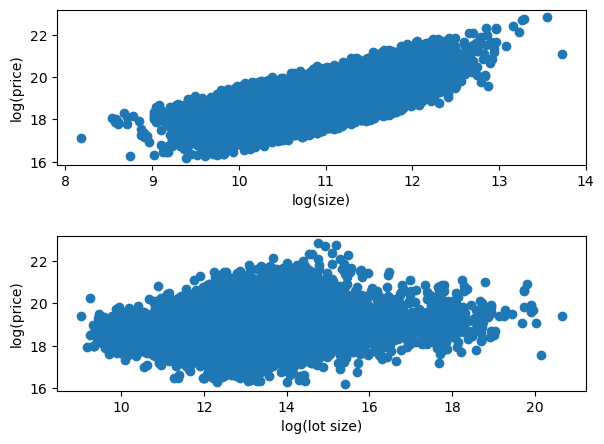

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].scatter(log_living_size,log_price)
ax[0].set(xlabel="log(size)")
ax[0].set(ylabel="log(price)")

ax[1].scatter(log_lot_size,log_price)
ax[1].set(xlabel="log(lot size)")
ax[1].set(ylabel="log(price)")

fig.tight_layout(pad=2.0)  ##<-need to add paddle otherwise too close cant see xlabel above

In [23]:
## Set up a multiple linear regression

params = tf.Variable([0.1,0.05,0.02])

def linear_reg(params,features1 = log_lot_size, features2=bedroom):
    return params[0] + params[1]*features1 + params[2]*features2

def loss(params,features1 = log_lot_size, features2=bedroom,targets = log_price):
    pred = linear_reg(params,features1, features2)
    
    return tf.keras.losses.mse(targets,pred)

In [24]:
loss(params).numpy()

324.8513

In [25]:
from tensorflow.keras.optimizers.legacy import Adam

In [26]:
## downgraded to tensorflow-macos==2.9 and tensorflow-metal==0.5.0 otherwise this step macbook will give error
## https://developer.apple.com/forums/thread/721619
## initialize an adam optimizer

opt = tf.keras.optimizers.Adam()

## defining a function to print the result

def print_results(params):
	return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'.format(loss(params).numpy(), params[0].numpy(), params[1].numpy(), params[2].numpy()))

## perform minimization

for j in range(100):
    opt.minimize(lambda: loss(params), var_list=[params])
    print_results(params)

loss: 324.227, intercept: 0.101, slope_1: 0.051, slope_2: 0.021
loss: 323.602, intercept: 0.102, slope_1: 0.052, slope_2: 0.022
loss: 322.979, intercept: 0.103, slope_1: 0.053, slope_2: 0.023
loss: 322.356, intercept: 0.104, slope_1: 0.054, slope_2: 0.024
loss: 321.734, intercept: 0.105, slope_1: 0.055, slope_2: 0.025
loss: 321.112, intercept: 0.106, slope_1: 0.056, slope_2: 0.026
loss: 320.491, intercept: 0.107, slope_1: 0.057, slope_2: 0.027
loss: 319.871, intercept: 0.108, slope_1: 0.058, slope_2: 0.028
loss: 319.252, intercept: 0.109, slope_1: 0.059, slope_2: 0.029
loss: 318.633, intercept: 0.110, slope_1: 0.060, slope_2: 0.030
loss: 318.015, intercept: 0.111, slope_1: 0.061, slope_2: 0.031
loss: 317.397, intercept: 0.112, slope_1: 0.062, slope_2: 0.032
loss: 316.781, intercept: 0.113, slope_1: 0.063, slope_2: 0.033
loss: 316.165, intercept: 0.114, slope_1: 0.064, slope_2: 0.034
loss: 315.550, intercept: 0.115, slope_1: 0.065, slope_2: 0.035
loss: 314.935, intercept: 0.116, slope_1

Batch Training Example

In [27]:
params = tf.Variable([0.1,0.05,0.02])

def linear_reg(params,features1, features2):
    return params[0] + params[1]*features1 + params[2]*features2

def loss(params,features1, features2, targets):
    pred = linear_reg(params,features1, features2)
    
    return tf.keras.losses.mse(targets,pred)

In [28]:
opt = tf.keras.optimizers.Adam()

In [29]:
for batch in pd.read_csv("https://assets.datacamp.com/production/repositories/3953/datasets/818cd72f8f36fb710e52074a41b0cfd322915eaa/kc_house_data.csv",chunksize=100):
    price_batch = np.array(batch['price'],np.float32)
    lot_size_batch = np.array(batch['sqft_lot'],np.float32)
    bedroom_batch = np.array(batch['bedrooms'],np.float32)
    log_logsize_batch = np.log2(lot_size_batch)
    
    ## for each batch, the opt will update the params
    opt.minimize(lambda: loss(params,log_logsize_batch,bedroom_batch,price_batch), var_list=[params])
    

print(params.numpy())

[0.3180278  0.26679683 0.23787388]


Low level (linear algebra) approach

In [50]:
## defining borrower feature for 1 sample with 3 features
borrower_features = tf.constant([[2,2,43]],np.float32) ##<-need a double [[]]
bias1 = tf.Variable(1.0)

## 3 corresponding to # of features, 2 correspond to the # of nodes in terms of high-lv approach
weights1= tf.Variable(tf.ones((3,2)))  ##<-need to give tuple (3,2)

In [47]:
weights1.numpy()

array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

In [58]:
product1=tf.matmul(borrower_features,weights1)
product1

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[47., 47.]], dtype=float32)>

In [57]:
dense1 = tf.keras.activations.sigmoid(product1+bias1)
print("\n dense1's output shape:{}.\n dense1 is{}: ".format(dense1.shape,dense1.numpy()))


 dense1's output shape:(1, 2).
 dense1 is[[1. 1.]]: 


High level Keras approach (Functional API)

In [59]:
## define borrower features as a 100x10 tensor (100 examples each with 10 features)

borrower_features = tf.constant([[6.96469188e-01, 2.86139339e-01, 2.26851448e-01, 5.51314771e-01,
        7.19468951e-01, 4.23106462e-01, 9.80764210e-01, 6.84829712e-01,
        4.80931908e-01, 3.92117530e-01],
       [3.43178004e-01, 7.29049683e-01, 4.38572258e-01, 5.96778952e-02,
        3.98044258e-01, 7.37995386e-01, 1.82491735e-01, 1.75451756e-01,
        5.31551361e-01, 5.31827569e-01],
       [6.34400964e-01, 8.49431813e-01, 7.24455297e-01, 6.11023486e-01,
        7.22443402e-01, 3.22958916e-01, 3.61788660e-01, 2.28263229e-01,
        2.93714046e-01, 6.30976140e-01],
       [9.21049416e-02, 4.33701187e-01, 4.30862755e-01, 4.93685097e-01,
        4.25830305e-01, 3.12261224e-01, 4.26351309e-01, 8.93389165e-01,
        9.44160044e-01, 5.01836658e-01],
       [6.23952925e-01, 1.15618393e-01, 3.17285478e-01, 4.14826214e-01,
        8.66309166e-01, 2.50455379e-01, 4.83034253e-01, 9.85559762e-01,
        5.19485116e-01, 6.12894535e-01],
       [1.20628662e-01, 8.26340795e-01, 6.03060126e-01, 5.45068026e-01,
        3.42763841e-01, 3.04120779e-01, 4.17022198e-01, 6.81300759e-01,
        8.75456870e-01, 5.10422349e-01],
       [6.69313788e-01, 5.85936546e-01, 6.24903500e-01, 6.74689054e-01,
        8.42342436e-01, 8.31949860e-02, 7.63682842e-01, 2.43666381e-01,
        1.94222957e-01, 5.72456956e-01],
       [9.57125202e-02, 8.85326803e-01, 6.27248943e-01, 7.23416328e-01,
        1.61292069e-02, 5.94431877e-01, 5.56785166e-01, 1.58959642e-01,
        1.53070509e-01, 6.95529521e-01],
       [3.18766415e-01, 6.91970289e-01, 5.54383278e-01, 3.88950586e-01,
        9.25132513e-01, 8.41669977e-01, 3.57397556e-01, 4.35914621e-02,
        3.04768085e-01, 3.98185670e-01],
       [7.04958856e-01, 9.95358467e-01, 3.55914861e-01, 7.62547791e-01,
        5.93176901e-01, 6.91701770e-01, 1.51127458e-01, 3.98876280e-01,
        2.40855902e-01, 3.43456000e-01],
       [5.13128161e-01, 6.66624546e-01, 1.05908483e-01, 1.30894944e-01,
        3.21980596e-01, 6.61564350e-01, 8.46506238e-01, 5.53257346e-01,
        8.54452491e-01, 3.84837806e-01],
       [3.16787899e-01, 3.54264677e-01, 1.71081826e-01, 8.29112649e-01,
        3.38670850e-01, 5.52370071e-01, 5.78551471e-01, 5.21533072e-01,
        2.68806447e-03, 9.88345444e-01],
       [9.05341566e-01, 2.07635865e-01, 2.92489409e-01, 5.20010173e-01,
        9.01911378e-01, 9.83630896e-01, 2.57542074e-01, 5.64359069e-01,
        8.06968689e-01, 3.94370049e-01],
       [7.31073022e-01, 1.61069021e-01, 6.00698590e-01, 8.65864456e-01,
        9.83521581e-01, 7.93657899e-02, 4.28347290e-01, 2.04542860e-01,
        4.50636476e-01, 5.47763586e-01],
       [9.33267102e-02, 2.96860784e-01, 9.27584231e-01, 5.69003761e-01,
        4.57412004e-01, 7.53525972e-01, 7.41862178e-01, 4.85790335e-02,
        7.08697379e-01, 8.39243352e-01],
       [1.65937886e-01, 7.80997932e-01, 2.86536604e-01, 3.06469738e-01,
        6.65261447e-01, 1.11392170e-01, 6.64872468e-01, 8.87856781e-01,
        6.96311295e-01, 4.40327883e-01],
       [4.38214391e-01, 7.65096068e-01, 5.65641999e-01, 8.49041641e-02,
        5.82671106e-01, 8.14843714e-01, 3.37066382e-01, 9.27576602e-01,
        7.50716984e-01, 5.74063838e-01],
       [7.51644015e-01, 7.91489631e-02, 8.59389067e-01, 8.21504116e-01,
        9.09871638e-01, 1.28631204e-01, 8.17800835e-02, 1.38415575e-01,
        3.99378717e-01, 4.24306870e-01],
       [5.62218368e-01, 1.22243546e-01, 2.01399505e-01, 8.11644375e-01,
        4.67987567e-01, 8.07938218e-01, 7.42637832e-03, 5.51592708e-01,
        9.31932151e-01, 5.82175434e-01],
       [2.06095725e-01, 7.17757583e-01, 3.78985852e-01, 6.68383956e-01,
        2.93197222e-02, 6.35900378e-01, 3.21979336e-02, 7.44780660e-01,
        4.72912997e-01, 1.21754356e-01],
       [5.42635918e-01, 6.67744428e-02, 6.53364897e-01, 9.96086299e-01,
        7.69397318e-01, 5.73774099e-01, 1.02635257e-01, 6.99834049e-01,
        6.61167860e-01, 4.90971319e-02],
       [7.92299330e-01, 5.18716574e-01, 4.25867707e-01, 7.88187146e-01,
        4.11569238e-01, 4.81026262e-01, 1.81628838e-01, 3.21318895e-01,
        8.45533013e-01, 1.86903745e-01],
       [4.17291075e-01, 9.89034534e-01, 2.36599818e-01, 9.16832328e-01,
        9.18397486e-01, 9.12963450e-02, 4.63652730e-01, 5.02216339e-01,
        3.13668936e-01, 4.73395362e-02],
       [2.41685644e-01, 9.55296382e-02, 2.38249913e-01, 8.07791114e-01,
        8.94978285e-01, 4.32228930e-02, 3.01946849e-01, 9.80582178e-01,
        5.39504826e-01, 6.26309335e-01],
       [5.54540846e-03, 4.84909445e-01, 9.88328516e-01, 3.75185519e-01,
        9.70381573e-02, 4.61908758e-01, 9.63004470e-01, 3.41830611e-01,
        7.98922718e-01, 7.98846304e-01],
       [2.08248302e-01, 4.43367690e-01, 7.15601265e-01, 4.10519779e-01,
        1.91006958e-01, 9.67494309e-01, 6.50750339e-01, 8.65459859e-01,
        2.52423584e-02, 2.66905814e-01],
       [5.02071083e-01, 6.74486384e-02, 9.93033290e-01, 2.36462399e-01,
        3.74292195e-01, 2.14011908e-01, 1.05445869e-01, 2.32479781e-01,
        3.00610125e-01, 6.34442270e-01],
       [2.81234771e-01, 3.62276763e-01, 5.94284385e-03, 3.65719140e-01,
        5.33885956e-01, 1.62015840e-01, 5.97433090e-01, 2.93152481e-01,
        6.32050514e-01, 2.61966046e-02],
       [8.87593448e-01, 1.61186308e-02, 1.26958027e-01, 7.77162433e-01,
        4.58952338e-02, 7.10998714e-01, 9.71046150e-01, 8.71682942e-01,
        7.10161626e-01, 9.58509743e-01],
       [4.29813325e-01, 8.72878909e-01, 3.55957657e-01, 9.29763675e-01,
        1.48777649e-01, 9.40029025e-01, 8.32716227e-01, 8.46054852e-01,
        1.23923011e-01, 5.96486926e-01],
       [1.63924806e-02, 7.21184373e-01, 7.73751410e-03, 8.48222747e-02,
        2.25498408e-01, 8.75124514e-01, 3.63576323e-01, 5.39959908e-01,
        5.68103194e-01, 2.25463361e-01],
       [5.72146773e-01, 6.60951793e-01, 2.98245400e-01, 4.18626845e-01,
        4.53088939e-01, 9.32350636e-01, 5.87493777e-01, 9.48252380e-01,
        5.56034744e-01, 5.00561416e-01],
       [3.53221106e-03, 4.80889052e-01, 9.27455008e-01, 1.98365688e-01,
        5.20911328e-02, 4.06778902e-01, 3.72396469e-01, 8.57153058e-01,
        2.66111158e-02, 9.20149207e-01],
       [6.80903018e-01, 9.04226005e-01, 6.07529044e-01, 8.11953306e-01,
        3.35543871e-01, 3.49566221e-01, 3.89874220e-01, 7.54797101e-01,
        3.69291186e-01, 2.42219806e-01],
       [9.37668383e-01, 9.08011079e-01, 3.48797321e-01, 6.34638071e-01,
        2.73842216e-01, 2.06115127e-01, 3.36339533e-01, 3.27099890e-01,
        8.82276118e-01, 8.22303832e-01],
       [7.09623218e-01, 9.59345222e-01, 4.22543347e-01, 2.45033041e-01,
        1.17398441e-01, 3.01053345e-01, 1.45263731e-01, 9.21861008e-02,
        6.02932215e-01, 3.64187449e-01],
       [5.64570367e-01, 1.91335723e-01, 6.76905870e-01, 2.15505451e-01,
        2.78023601e-01, 7.41760433e-01, 5.59737921e-01, 3.34836423e-01,
        5.42988777e-01, 6.93984687e-01],
       [9.12132144e-01, 5.80713212e-01, 2.32686386e-01, 7.46697605e-01,
        7.77769029e-01, 2.00401321e-01, 8.20574224e-01, 4.64934856e-01,
        7.79766679e-01, 2.37478226e-01],
       [3.32580268e-01, 9.53697145e-01, 6.57815099e-01, 7.72877812e-01,
        6.88374341e-01, 2.04304114e-01, 4.70688760e-01, 8.08963895e-01,
        6.75035119e-01, 6.02788571e-03],
       [8.74077454e-02, 3.46794724e-01, 9.44365561e-01, 4.91190493e-01,
        2.70176262e-01, 3.60423714e-01, 2.10652635e-01, 4.21200067e-01,
        2.18035445e-01, 8.45752478e-01],
       [4.56270605e-01, 2.79802024e-01, 9.32891667e-01, 3.14351350e-01,
        9.09714639e-01, 4.34180908e-02, 7.07115054e-01, 4.83889043e-01,
        4.44221050e-01, 3.63233462e-02],
       [4.06831913e-02, 3.32753628e-01, 9.47119534e-01, 6.17659986e-01,
        3.68874848e-01, 6.11977041e-01, 2.06131533e-01, 1.65066436e-01,
        3.61817271e-01, 8.63353372e-01],
       [5.09401739e-01, 2.96901524e-01, 9.50251639e-01, 8.15966070e-01,
        3.22973937e-01, 9.72098231e-01, 9.87351120e-01, 4.08660144e-01,
        6.55923128e-01, 4.05653208e-01],
       [2.57348120e-01, 8.26526731e-02, 2.63610333e-01, 2.71479845e-01,
        3.98639083e-01, 1.84886038e-01, 9.53818381e-01, 1.02879882e-01,
        6.25208557e-01, 4.41697389e-01],
       [4.23518062e-01, 3.71991783e-01, 8.68314683e-01, 2.80476987e-01,
        2.05761567e-02, 9.18097019e-01, 8.64480257e-01, 2.76901782e-01,
        5.23487568e-01, 1.09088197e-01],
       [9.34270695e-02, 8.37466121e-01, 4.10265714e-01, 6.61716521e-01,
        9.43200588e-01, 2.45130599e-01, 1.31598311e-02, 2.41484065e-02,
        7.09385693e-01, 9.24551904e-01],
       [4.67330277e-01, 3.75109136e-01, 5.42860448e-01, 8.58916819e-01,
        6.52153850e-01, 2.32979894e-01, 7.74580181e-01, 1.34613499e-01,
        1.65559977e-01, 6.12682283e-01],
       [2.38783404e-01, 7.04778552e-01, 3.49518538e-01, 2.77423948e-01,
        9.98918414e-01, 4.06161249e-02, 6.45822525e-01, 3.86995859e-02,
        7.60210276e-01, 2.30089962e-01],
       [8.98318663e-02, 6.48449719e-01, 7.32601225e-01, 6.78095341e-01,
        5.19009456e-02, 2.94306934e-01, 4.51088339e-01, 2.87103295e-01,
        8.10513437e-01, 1.31115109e-01],
       [6.12179339e-01, 9.88214970e-01, 9.02556539e-01, 2.22157061e-01,
        8.18876142e-05, 9.80597317e-01, 8.82712960e-01, 9.19472456e-01,
        4.15503561e-01, 7.44615436e-01],
       [2.12831497e-01, 3.92304063e-01, 8.51548076e-01, 1.27612218e-01,
        8.93865347e-01, 4.96507972e-01, 4.26095665e-01, 3.05646390e-01,
        9.16848779e-01, 5.17623484e-01],
       [8.04026365e-01, 8.57651770e-01, 9.22382355e-01, 3.03380728e-01,
        3.39810848e-01, 5.95073879e-01, 4.41324145e-01, 9.32842553e-01,
        3.97564054e-01, 4.77778047e-01],
       [6.17186069e-01, 4.04739499e-01, 9.92478430e-01, 9.88512859e-02,
        2.20603317e-01, 3.22655141e-01, 1.47722840e-01, 2.84219235e-01,
        7.79245317e-01, 5.22891998e-01],
       [3.39536369e-02, 9.82622564e-01, 6.16006494e-01, 5.89394793e-02,
        6.61168754e-01, 3.78369361e-01, 1.35673299e-01, 5.63664615e-01,
        7.27079928e-01, 6.71126604e-01],
       [2.47513160e-01, 5.24866223e-01, 5.37663460e-01, 7.16803372e-01,
        3.59867334e-01, 7.97732592e-01, 6.27921820e-01, 3.83316055e-02,
        5.46479046e-01, 8.61912072e-01],
       [5.67574143e-01, 1.75828263e-01, 5.10376394e-01, 7.56945848e-01,
        1.10105194e-01, 8.17099094e-01, 1.67481646e-01, 5.34076512e-01,
        3.85743469e-01, 2.48623773e-01],
       [6.47432506e-01, 3.73921096e-02, 7.60045826e-01, 5.26940644e-01,
        8.75771224e-01, 5.20718336e-01, 3.50331701e-02, 1.43600971e-01,
        7.95604587e-01, 4.91976053e-01],
       [4.41879272e-01, 3.18434775e-01, 2.84549206e-01, 9.65886295e-01,
        4.32969332e-01, 8.84003043e-01, 6.48163140e-01, 8.58427644e-01,
        8.52449536e-01, 9.56312001e-01],
       [6.97942257e-01, 8.05396914e-01, 7.33127892e-01, 6.05226815e-01,
        7.17354119e-01, 7.15750396e-01, 4.09077927e-02, 5.16110837e-01,
        7.92651355e-01, 2.42962182e-01],
       [4.65147972e-01, 4.34985697e-01, 4.02787179e-01, 1.21839531e-01,
        5.25711536e-01, 4.46248353e-01, 6.63392782e-01, 5.49413085e-01,
        2.75429301e-02, 3.19179893e-02],
       [7.01359808e-01, 7.07581103e-01, 9.59939122e-01, 8.76704693e-01,
        4.68059659e-01, 6.25906527e-01, 4.57181722e-01, 2.22946241e-01,
        3.76677006e-01, 1.03884235e-01],
       [6.66527092e-01, 1.92030147e-01, 4.75467801e-01, 9.67436612e-01,
        3.16689312e-02, 1.51729956e-01, 2.98579186e-01, 9.41806972e-01,
        9.08841789e-01, 1.62000835e-01],
       [9.81117785e-01, 7.50747502e-01, 5.39977074e-01, 9.31702912e-01,
        8.80607128e-01, 3.91316503e-01, 6.56343222e-01, 6.47385120e-01,
        3.26968193e-01, 1.79390177e-01],
       [4.66809869e-01, 2.63281047e-01, 3.55065137e-01, 9.54143941e-01,
        4.61137861e-01, 6.84891462e-01, 3.36229891e-01, 9.95861053e-01,
        6.58767581e-01, 1.96009472e-01],
       [9.81839970e-02, 9.43180561e-01, 9.44777846e-01, 6.21328354e-01,
        1.69914998e-02, 2.25534886e-01, 8.01276803e-01, 8.75459850e-01,
        4.53989804e-01, 3.65520626e-01],
       [2.74224997e-01, 1.16970517e-01, 1.15744539e-01, 9.52602684e-01,
        8.08626115e-01, 1.64779365e-01, 2.07050055e-01, 6.55551553e-01,
        7.64664233e-01, 8.10314834e-01],
       [1.63337693e-01, 9.84128296e-01, 2.27802068e-01, 5.89415431e-01,
        5.87615728e-01, 9.67361867e-01, 6.57667458e-01, 5.84904253e-01,
        5.18772602e-01, 7.64657557e-01],
       [1.06055260e-01, 2.09190114e-03, 9.52488840e-01, 4.98657674e-01,
        3.28335375e-01, 3.68053257e-01, 8.03843319e-01, 3.82370204e-01,
        7.70169199e-01, 4.40461993e-01],
       [8.44077468e-01, 7.62040615e-02, 4.81128335e-01, 4.66849715e-01,
        2.64327973e-01, 9.43614721e-01, 9.05028462e-01, 4.43596303e-01,
        9.71596092e-02, 2.06783146e-01],
       [2.71491826e-01, 4.84219760e-01, 3.38377118e-01, 7.74136066e-01,
        4.76026595e-01, 8.70370507e-01, 9.95781779e-01, 2.19835952e-01,
        6.11671388e-01, 8.47502291e-01],
       [9.45236623e-01, 2.90086418e-01, 7.27042735e-01, 1.50161488e-02,
        8.79142463e-01, 6.39385507e-02, 7.33395398e-01, 9.94610369e-01,
        5.01189768e-01, 2.09333986e-01],
       [5.94643593e-01, 6.24149978e-01, 6.68072760e-01, 1.72611743e-01,
        8.98712695e-01, 6.20991349e-01, 4.35687043e-02, 6.84041083e-01,
        1.96084052e-01, 2.73407809e-02],
       [5.50953269e-01, 8.13313663e-01, 8.59941125e-01, 1.03520922e-01,
        6.63042784e-01, 7.10075200e-01, 2.94516981e-01, 9.71364021e-01,
        2.78687477e-01, 6.99821860e-02],
       [5.19280374e-01, 6.94314897e-01, 2.44659781e-01, 3.38582188e-01,
        5.63627958e-01, 8.86678159e-01, 7.47325897e-01, 2.09591955e-01,
        2.51777083e-01, 5.23880661e-01],
       [7.68958688e-01, 6.18761778e-01, 5.01324296e-01, 5.97125351e-01,
        7.56060004e-01, 5.37079811e-01, 8.97752762e-01, 9.47067499e-01,
        9.15354490e-01, 7.54518330e-01],
       [2.46321008e-01, 3.85271460e-01, 2.79999942e-01, 6.57660246e-01,
        3.24221611e-01, 7.54391611e-01, 1.13509081e-01, 7.75364757e-01,
        5.85901976e-01, 8.35388660e-01],
       [4.30875659e-01, 6.24964476e-01, 5.54412127e-01, 9.75671291e-01,
        7.55474389e-01, 5.44813275e-01, 1.74032092e-01, 9.04114246e-01,
        2.05837786e-01, 6.50043249e-01],
       [9.36471879e-01, 2.23579630e-01, 2.25923538e-01, 8.51818919e-01,
        8.27655017e-01, 3.51703346e-01, 2.65096277e-01, 1.27388477e-01,
        9.87936080e-01, 8.35343122e-01],
       [8.99391592e-01, 5.13679326e-01, 1.14384830e-01, 5.25803380e-02,
        3.30582112e-01, 9.20330405e-01, 9.47581828e-01, 8.41163874e-01,
        1.58679143e-01, 4.19923156e-01],
       [2.46242926e-01, 2.05349773e-01, 6.84825838e-01, 4.86111671e-01,
        3.24909657e-01, 1.00214459e-01, 5.44763386e-01, 3.47025156e-01,
        3.91095817e-01, 3.10508728e-01],
       [3.87195200e-01, 5.55859566e-01, 1.41438060e-02, 8.47647011e-01,
        9.21919882e-01, 5.50529718e-01, 2.68021107e-01, 9.90239024e-01,
        3.83194029e-01, 6.93655372e-01],
       [6.89952552e-01, 4.34309065e-01, 1.99158162e-01, 9.66579378e-01,
        6.36908561e-02, 4.85149384e-01, 2.20730707e-01, 2.93974131e-01,
        8.28527331e-01, 3.67265552e-01],
       [8.33482668e-02, 1.96309000e-01, 8.60373437e-01, 9.77028847e-01,
        2.67982155e-01, 6.75408959e-01, 8.11989978e-02, 7.23465621e-01,
        4.16436613e-01, 9.18159902e-01],
       [3.11536163e-01, 9.41466987e-01, 5.03247440e-01, 3.48892927e-01,
        6.47019625e-01, 2.49746203e-01, 2.29763597e-01, 1.96346447e-01,
        9.59899545e-01, 4.92913723e-01],
       [7.51614988e-01, 4.73991871e-01, 5.87540150e-01, 5.84138989e-01,
        9.79886293e-01, 6.68433130e-01, 2.39769474e-01, 1.51976589e-02,
        2.18682140e-01, 4.55519646e-01],
       [3.93420339e-01, 8.12326252e-01, 7.85556734e-01, 8.90959650e-02,
        9.52010751e-01, 5.27456701e-01, 5.96403956e-01, 4.05056775e-01,
        6.49500966e-01, 8.71326327e-01],
       [6.73935950e-01, 9.70098555e-01, 7.01122224e-01, 8.21720719e-01,
        4.50395830e-02, 6.72698498e-01, 6.54752672e-01, 1.01746053e-01,
        8.42387497e-01, 6.14172399e-01],
       [9.83280912e-02, 5.94467103e-01, 4.78415847e-01, 2.33293563e-01,
        1.97560899e-02, 3.65567267e-01, 6.19851053e-01, 3.29279125e-01,
        3.07254642e-01, 7.51121223e-01],
       [7.58624673e-01, 7.18765855e-01, 1.01181954e-01, 5.16165972e-01,
        5.57798684e-01, 7.44804502e-01, 9.03177738e-01, 3.69038880e-01,
        4.28663462e-01, 7.32767463e-01],
       [6.62636399e-01, 5.57869911e-01, 3.50139618e-01, 1.95352346e-01,
        1.83807373e-01, 8.15832913e-02, 8.12008530e-02, 8.45798194e-01,
        3.83672744e-01, 6.07396215e-02],
       [8.96425664e-01, 2.23270476e-01, 2.68124431e-01, 1.94497839e-01,
        9.67501044e-01, 1.12540089e-01, 7.22163260e-01, 9.32088733e-01,
        6.68001294e-01, 8.58726621e-01],
       [2.42447108e-01, 6.73927963e-01, 7.00871348e-01, 4.58332509e-01,
        8.70545626e-01, 6.94386125e-01, 8.94877791e-01, 7.53204346e-01,
        5.20290434e-01, 4.98688221e-01],
       [4.53727633e-01, 2.16468628e-02, 5.35141408e-01, 4.22973245e-01,
        1.57533601e-01, 1.19069695e-01, 4.49351877e-01, 3.99130546e-02,
        9.86579895e-01, 3.78120929e-01],
       [3.82109195e-01, 5.11263013e-02, 4.26672339e-01, 1.57454368e-02,
        3.00936326e-02, 3.39099228e-01, 8.20968926e-01, 4.58821088e-01,
        1.48405796e-02, 1.63220033e-01],
       [7.39922702e-01, 7.38293707e-01, 7.54522920e-01, 3.51669371e-01,
        3.52276951e-01, 8.02075684e-01, 3.98137897e-01, 7.27191031e-01,
        5.81122994e-01, 3.64341676e-01],
       [8.00065175e-02, 1.16125375e-01, 8.89558733e-01, 4.52340513e-01,
        9.94004548e-01, 3.63896936e-01, 2.49954298e-01, 3.50539327e-01,
        3.43086094e-01, 6.37356758e-01],
       [1.27375638e-02, 7.63268650e-01, 4.16414618e-01, 4.32239205e-01,
        4.81115013e-01, 4.49212462e-01, 4.97470886e-01, 3.45904320e-01,
        4.53346133e-01, 4.04651344e-01],
       [5.18242717e-01, 6.23269081e-01, 2.41040602e-01, 5.08437157e-01,
        5.94621897e-01, 1.69483144e-02, 5.20493746e-01, 2.39293247e-01,
        4.04538542e-01, 8.26530159e-01],
       [3.26235592e-01, 4.83216912e-01, 2.47411542e-02, 3.08750868e-01,
        6.39721096e-01, 3.15161765e-01, 2.05797508e-01, 2.90655673e-01,
        9.54378307e-01, 8.68018195e-02],
       [4.63357776e-01, 5.83869033e-02, 5.38658261e-01, 1.46035731e-01,
        6.34084821e-01, 2.64397472e-01, 6.90915406e-01, 3.47146064e-01,
        4.16848855e-03, 2.94894695e-01]])

In [62]:
## define the first layer

dense1 = tf.keras.layers.Dense(7,activation='sigmoid')(borrower_features)

## the dense layer do the following: created the corresponding shape of weights
## then matrix multiplication between the weights and the input
## then applied act function

In [64]:
dense1.shape

TensorShape([100, 7])

In [65]:
## define the second layer

dense2 = tf.keras.layers.Dense(3,activation='sigmoid')(dense1)

In [66]:
dense2.shape

TensorShape([100, 3])

In [68]:
## define the output layer

prediction = tf.keras.layers.Dense(1,activation='sigmoid')(dense2)
prediction.shape

TensorShape([100, 1])

In [83]:
import math
def haha(x):
    y = 4.0*math.cos(x-1)+tf.divide(math.cos(2.0*3.14*x),x)
    return y.numpy()

In [103]:
y = []
for x in range(1,100):
    y.append(haha(x))


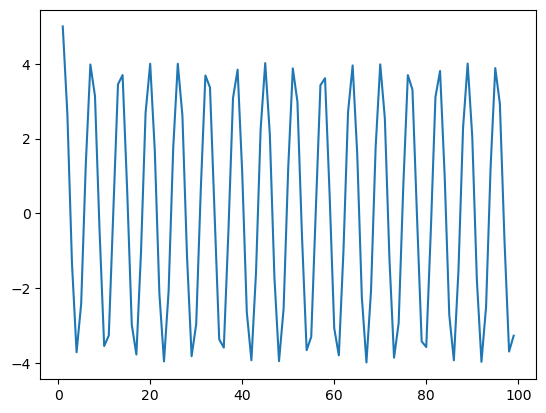

In [104]:
plt.plot(range(1,100),y)

Below model are not workable in the sense that we did not define features, the target and the params

In [115]:
# Define the model
def model(w1, b1, w2, b2, features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1) ##<-used a low lv approach
    # Apply dropout
	dropout = keras.layers.Dropout(0.25)(layer1) ##<-high level
	return keras.activations.sigmoid(matmul(dropout, w2) + b2) ##<-low lv 

# Define the loss function
def loss_function(w1, b1, w2, b2, features, targets):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

In [116]:
# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2,features, targets), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)

NameError: name 'w1' is not defined

Ch4. Sequential API

In [8]:
# define a keras sequential model
model = tf.keras.Sequential()
# define first dense layer
model.add(tf.keras.layers.Dense(16,activation='relu',input_shape=(781,)))
# define second dense layer
model.add(tf.keras.layers.Dense(8,activation='relu'))
#define output layer
model.add(tf.keras.layers.Dense(4,activation='softmax'))

# print model architecture
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12512     
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
Total params: 12,684
Trainable params: 12,684
Non-trainable params: 0
_________________________________________________________________
None


Defining a model with dropout layer

In [14]:
# define a keras sequential model
model = tf.keras.Sequential()
# define first dense layer
model.add(tf.keras.layers.Dense(16,activation='sigmoid',input_shape=(784,)))
# define a dropout layer
model.add(tf.keras.layers.Dropout(0.25))
# define output layer
model.add(tf.keras.layers.Dense(4,activation='softmax'))
#compile the model
model.compile('adam',loss='categorical_crossentropy')

#print model architecture
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 4)                 68        
                                                                 
Total params: 12,628
Trainable params: 12,628
Non-trainable params: 0
_________________________________________________________________
None


Define a multiple input model (need to use Functional API)

In [16]:
# def model 1 input layer shape
model1_inputs = tf.keras.Input(shape=(28*28,))
model2_inputs = tf.keras.Input(shape=(10,))
## vs borrower feature example above, the dense1 is directly connected to the tf.constant 

# define layers for model 1
model1_layer1 = tf.keras.layers.Dense(12,activation='sigmoid')(model1_inputs)
model1_layer2 = tf.keras.layers.Dense(4,activation='softmax')(model1_layer1)

# define layers for model 2
model2_layer1 = tf.keras.layers.Dense(12,activation='relu')(model2_inputs)
model2_layer2 = tf.keras.layers.Dense(4,activation='softmax')(model2_layer1)

# Merging model outputs and define a functional model
merged = tf.keras.layers.add([model1_layer2,model2_layer2])
model = tf.keras.Model(inputs=[model1_inputs,model2_inputs],outputs=merged)

#print model architecture
print(model.summary())



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 12)           9420        ['input_1[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 12)           132         ['input_2[0][0]']                
                                                                                              

In [26]:
MINT_df = pd.read_csv("https://assets.datacamp.com/production/repositories/3953/datasets/556e17437b93b8cfada1f4c29ea5fb5833393dfc/slmnist.csv",
                      header=None) #<-no header in the data source

In [30]:
MINT_df.shape

(2000, 785)

In [67]:
label = pd.Categorical(MINT_df.iloc[:,0])
label_dum = pd.get_dummies(label)
label_array = np.array(label_dum)


In [50]:
features = np.array(MINT_df.iloc[:,1:])


In [71]:
## found that if I did not standardize the features, the model perform very bad and did not improve after second eopch

from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
features_stan = SS.fit_transform(features)

In [74]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16,activation='relu',input_shape=(784,)))
model.add(tf.keras.layers.Dense(4,activation='softmax'))
model.compile('SGD',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(features_stan,label_array,epochs=5,validation_split=0.2)

Epoch 1/5
13/50 [======>.......................] - ETA: 0s - loss: 1.0683 - accuracy: 0.5745

2023-02-12 11:45:43.811151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 15ms/step - loss: 0.6799 - accuracy: 0.7950 - val_loss: 0.3308 - val_accuracy: 0.9400
Epoch 2/5
 1/50 [..............................] - ETA: 0s - loss: 0.2639 - accuracy: 0.9688

2023-02-12 11:45:44.455083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 11ms/step - loss: 0.2260 - accuracy: 0.9756 - val_loss: 0.1556 - val_accuracy: 0.9850
Epoch 3/5
50/50 [==============================] - 1s 11ms/step - loss: 0.1127 - accuracy: 0.9950 - val_loss: 0.0875 - val_accuracy: 0.9975
Epoch 4/5
50/50 [==============================] - 1s 11ms/step - loss: 0.0689 - accuracy: 0.9994 - val_loss: 0.0601 - val_accuracy: 0.9975
Epoch 5/5
50/50 [==============================] - 1s 14ms/step - loss: 0.0487 - accuracy: 0.9994 - val_loss: 0.0443 - val_accuracy: 1.0000


In [75]:
model.evaluate(features_stan,label_array)

63/63 [==============================] - 1s 9ms/step - loss: 0.0420 - accuracy: 0.9995


[0.041960932314395905, 0.999500036239624]

Estimators API

In [78]:
# Define features

bedrooms = tf.feature_column.numeric_column("bedrooms")
bathrooms = tf.feature_column.numeric_column("bathrooms")

#define the list of feature columns
feature_list = [bedrooms,bathrooms]

def input_fn():
    #define the labels
    labels = np.array(housing['price'])
    #define the features
    features = {'bedrooms':np.array(housing['bedrooms']),
                'bathrooms':np.array(housing['bathrooms'])}
    return features,labels

#define the model and set the number of steps

model = tf.estimator.DNNRegressor(feature_columns=feature_list,
                                  hidden_units=[2,2]) #2 nodes in both the first and second hidden layer
model.train(input_fn,steps=1) # 1 training step

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/k2/0zwyn2913cvf5k4bldh_v2540000gn/T/tmpq93bo5l0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Ins

2023-02-12 12:07:55.188123: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-12 12:07:55.188159: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-12 12:07:55.196991: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-02-12 12:07:55.201935: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
    

INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/k2/0zwyn2913cvf5k4bldh_v2540000gn/T/tmpq93bo5l0/model.ckpt.


2023-02-12 12:07:55.707370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:/var/folders/k2/0zwyn2913cvf5k4bldh_v2540000gn/T/tmpq93bo5l0/model.ckpt-0.data-00000-of-00001
INFO:tensorflow:0
INFO:tensorflow:/var/folders/k2/0zwyn2913cvf5k4bldh_v2540000gn/T/tmpq93bo5l0/model.ckpt-0.index
INFO:tensorflow:0
INFO:tensorflow:/var/folders/k2/0zwyn2913cvf5k4bldh_v2540000gn/T/tmpq93bo5l0/model.ckpt-0.meta
INFO:tensorflow:600
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


2023-02-12 12:07:55.997464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:loss = 426471360000.0, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/k2/0zwyn2913cvf5k4bldh_v2540000gn/T/tmpq93bo5l0/model.ckpt.
INFO:tensorflow:/var/folders/k2/0zwyn2913cvf5k4bldh_v2540000gn/T/tmpq93bo5l0/model.ckpt-1.data-00000-of-00001
INFO:tensorflow:0
INFO:tensorflow:/var/folders/k2/0zwyn2913cvf5k4bldh_v2540000gn/T/tmpq93bo5l0/model.ckpt-1.meta
INFO:tensorflow:600
INFO:tensorflow:/var/folders/k2/0zwyn2913cvf5k4bldh_v2540000gn/T/tmpq93bo5l0/model.ckpt-1.index
INFO:tensorflow:600
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...
INFO:tensorflow:Loss for final step: 426471360000.0.
